In [83]:
import os
import pandas as pd
import numpy as np
import datetime
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency



In [5]:
cl = pd.read_csv("data/cholera-dataset.csv")

In [6]:
cl.head()

,Unnamed: 0,age,sex,dh,rbp,c,seizures,vc,ia,bt0,fc,exposed_to,fever,cholera
0,0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [10]:
cl = cl.drop("Unnamed: 0", axis=1)

In [11]:
columns_name = ["age", "sex", "dehydration", "blood_pressure", "colestherol", "seizures", "vomit_color", \
              "gastric_acid", "blood_type_o","poo_consistency","exposure_type", "fever","cholera"]

cl.columns = columns_name


In [20]:
cl.describe()

,age,dehydration,blood_pressure,colestherol,seizures,vomit_color,gastric_acid,blood_type_o,poo_consistency,exposure_type,...,0,1,2,0,1,2,3,4,0,1
count,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,...,0.069307,0.462046,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.993399,0.006601
std,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,...,0.254395,0.499382,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.081110
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
cl.head(3)

,age,sex,dehydration,blood_pressure,colestherol,seizures,vomit_color,gastric_acid,blood_type_o,poo_consistency,exposure_type,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1


In [34]:
sex_dehydration = cl.groupby(["sex","dehydration"])

In [35]:
sex_dehydration

In [36]:
sex_dehydration_df = sex_dehydration.size().unstack()

In [37]:
sex_dehydration_df

dehydration,0,1,2,3
sex,,,,
Female,39,18,35,4
Male,104,32,52,19


In [40]:
sex_seizures = cl.groupby(["sex","seizures"])

In [42]:
sex_seizures_df = sex_seizures.size().unstack()

In [43]:
sex_seizures_df

seizures,0,1
sex,,
Female,84,12
Male,174,33


In [45]:
sex_cholera = cl.groupby(["sex","cholera"])

In [46]:
sex_cholera_df = sex_cholera.size().unstack()

In [48]:
sex_cholera_df

cholera,0,1
sex,,
Female,24,72
Male,114,93


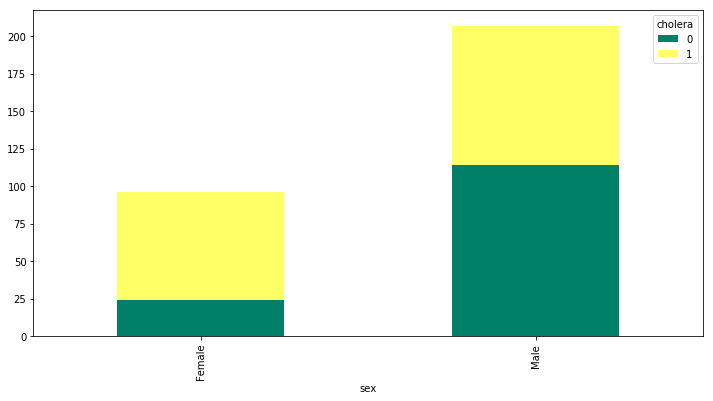

In [114]:
sex_cholera_df.plot(kind='bar', stacked=True, figsize=[12,6], colormap='summer')

In [55]:
cholera_dehydration = cl.groupby(["cholera","dehydration"])

In [56]:
cholera_dehydration_df = cholera_dehydration.size().unstack()

In [57]:
cholera_dehydration_df

dehydration,0,1,2,3
cholera,,,,
0,104,9,18,7
1,39,41,69,16


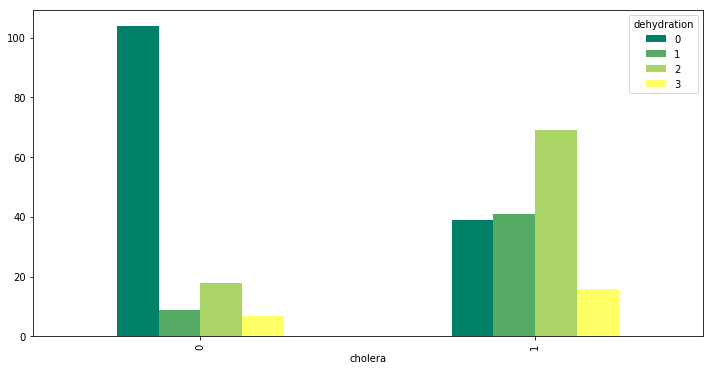

In [119]:
cholera_dehydration_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

In [60]:
cholera_seizures = cl.groupby(["cholera","seizures"])

In [61]:
cholera_seizures_df = cholera_seizures.size().unstack()

In [62]:
cholera_seizures_df

seizures,0,1
cholera,,
0,116,22
1,142,23


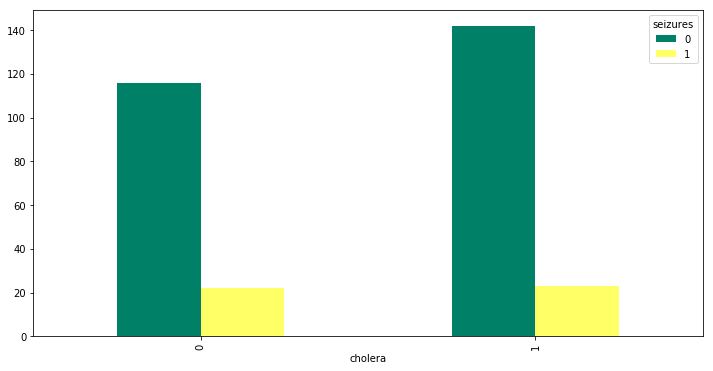

In [111]:
cholera_seizures_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

In [66]:
cholera_vomit = cl.groupby(["cholera","vomit_color"])
cholera_vomit_df = cholera_vomit.size().unstack()
cholera_vomit_df

vomit_color,0,1,2
cholera,,,
0,79,56,3
1,68,96,1


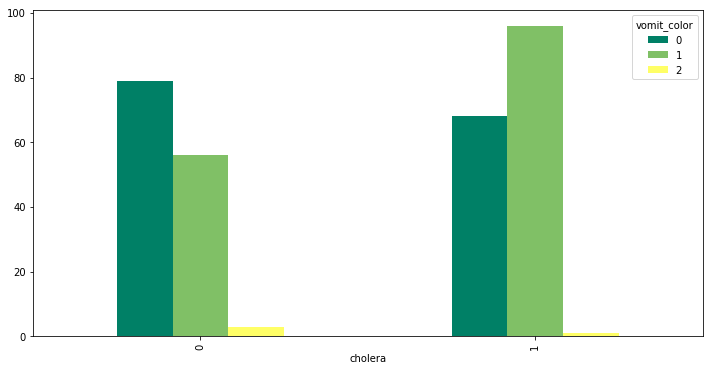

In [110]:
cholera_vomit_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

In [68]:
cholera_blood_type = cl.groupby(["cholera","blood_type_o"])
cholera_blood_type_df = cholera_blood_type.size().unstack()
cholera_blood_type_df

blood_type_o,0,1
cholera,,
0,62,76
1,142,23


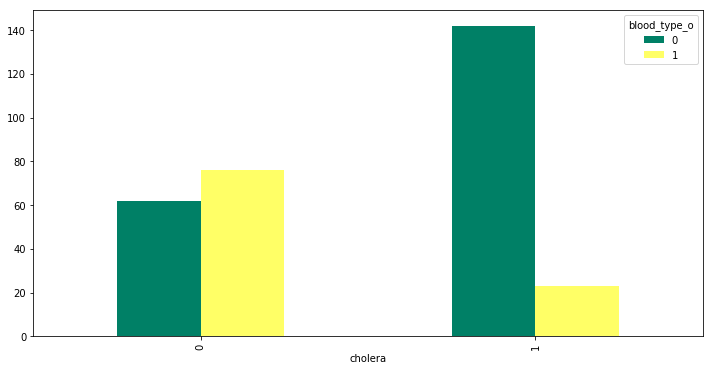

In [109]:
cholera_blood_type_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

In [71]:
cholera_poo = cl.groupby(["cholera","poo_consistency"])
cholera_poo_df = cholera_poo.size().unstack()
cholera_poo_df

poo_consistency,0,1,2
cholera,,,
0,12,91,35
1,9,49,107


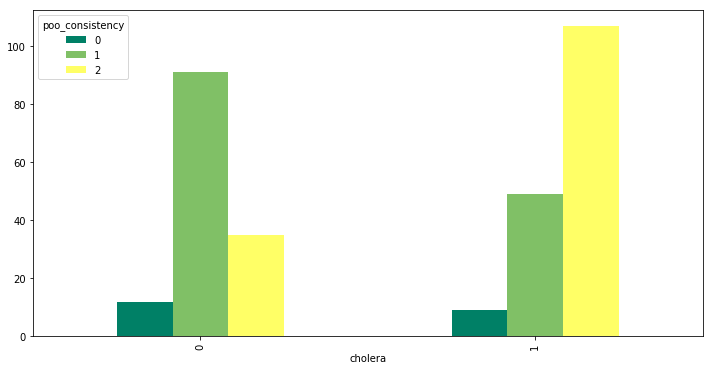

In [108]:
cholera_poo_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

In [77]:
cholera_exposure = cl.groupby(["cholera","exposure_type"])
cholera_exposure_df = cholera_exposure.size().unstack()
cholera_exposure_df

exposure_type,0,1,2,3,4
cholera,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


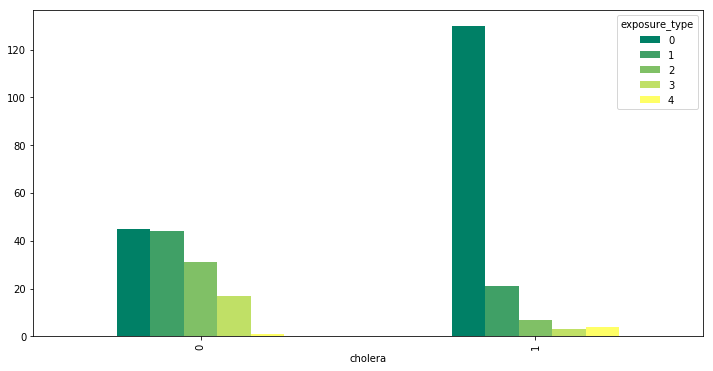

In [106]:
cholera_exposure_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

In [79]:
cholera_fever = cl.groupby(["cholera","fever"])
cholera_fever_df = cholera_fever.size().unstack()
cholera_fever_df

fever,0,1
cholera,,
0,136.0,2.0
1,165.0,NaN


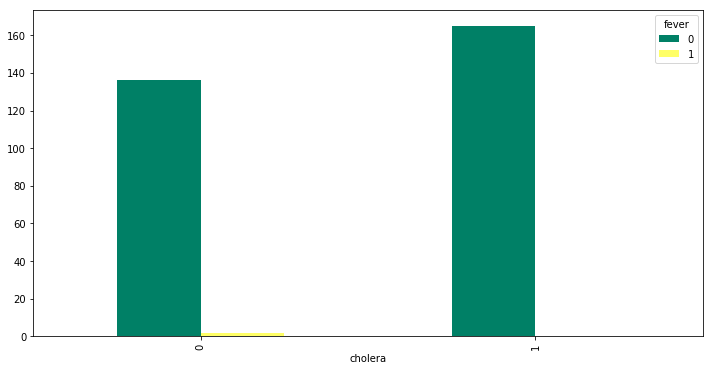

In [105]:
cholera_fever_df.plot(kind='bar', stacked=False, figsize=[12,6], colormap='summer')

### Hypothesis contrast

HO. Cholera and dehydration are independent

H1. Cholera and dehydration are dependent

#### Cholera vs dehydration

In [97]:
stat, p, dof, expected = chi2_contingency(cholera_dehydration_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

There is enough evidence to reject the H0, p-value 0.0 is < than the chosen alpha 0.05, so variables observed are dependent


### More contrast hypothesis for other categorical variable pairs

#### cholera vs seizures

In [98]:
stat, p, dof, expected = chi2_contingency(cholera_seizures_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

We fail to reject the H0, so we cannot say variables tested are independent


#### cholera vs vomit color

In [99]:
stat, p, dof, expected = chi2_contingency(cholera_vomit_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

There is enough evidence to reject the H0, p-value 0.0 is < than the chosen alpha 0.05, so variables observed are dependent


#### cholera vs blood_type_o

In [100]:
stat, p, dof, expected = chi2_contingency(cholera_blood_type_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

There is enough evidence to reject the H0, p-value 0.0 is < than the chosen alpha 0.05, so variables observed are dependent


#### cholera vs poo consistency

In [101]:
stat, p, dof, expected = chi2_contingency(cholera_poo_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

There is enough evidence to reject the H0, p-value 0.0 is < than the chosen alpha 0.05, so variables observed are dependent


#### cholera vs exposure type

In [103]:
stat, p, dof, expected = chi2_contingency(cholera_exposure_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

There is enough evidence to reject the H0, p-value 0.0 is < than the chosen alpha 0.05, so variables observed are dependent


#### cholera vs fever

In [104]:
stat, p, dof, expected = chi2_contingency(cholera_fever_df)

alpha = 0.05
if p <= alpha:
    print(f'There is enough evidence to reject the H0, p-value {round(p)} is < than the chosen alpha {alpha}, so variables observed are dependent')
else:
    print('We fail to reject the H0, so we cannot say variables tested are independent')

We fail to reject the H0, so we cannot say variables tested are independent


/home/salva/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:243: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


### Summary

Hypothesis contrast question 1

HO. Cholera and dehydration are independent, hence we can't assume cholera causing dehydration

H1. Cholera and dehydration are dependent, so we can say cholera causes dehydration (applying common sense)

**Results**:
There is enough evidence to reject the H0, p-value 0.0 is < than the chosen alpha 0.05, so applying medical sense we can say that cholera causes dehydration.

There is also statistical significance to state that vomit color, blood type o, poo consistency and exposure type depend on having the cholera disease or not. Which it allows us to trace additional cause-effect relationships with our target variable. For instance, we are confident to state that poo consistency and vomit color changes with the cholera disease.